# Vibration System Objects

In [1]:
import numpy as np
import vibration_toolbox as vtb
%matplotlib notebook

This notebook will introduce the class VibeSystem(), which is available in the vibration_toolbox.
As an example we will use the following 3 degree of freedom system:

![System](system.png)

If we look at the help for the VibeSystem class we have:
```
Parameters
----------
M : array
    Mass matrix.
C : array
    Damping matrix.
K : array
    Stiffness matrix.
name : str, optional
    Name of the system.
```
So we need to get the mass, stiffness and damping matrix to create a VibeSystem object (the name of the system is optional and can be used latter to help when we plot results).

For this system the kinetic energy is:

\begin{equation}
T = \frac{1}{2}[m_0\dot{q_0}(t)^2 + m_1\dot{q_1}(t)^2 + m_2\dot{q_2}(t)^2] = \frac{1}{2}{\bf \dot{q}}^T(t)\ M \ {\bf \dot{q}}(t)
\end{equation}

where ${\bf q(t)} = [q_0(t) \  q_1(t) \ q_2(t)]^T$ is the configuration vector. The mass matrix for this system is given by:

\begin{equation}
M = 
\begin{bmatrix} 
        m_0 & 0 & 0\\
        0 & m_1 & 0 \\
        0 & 0 & m_2
\end{bmatrix}
\end{equation}  

The potential energy is:

\begin{equation}
V = \frac{1}{2}[k_0 q_0(t)^2 + k_1(q_1(t) - q_0(t))^2 + k_2 q_2(t)^2]
\end{equation}

\begin{equation}
= \frac{1}{2}[(k_0+k_1)q_0(t)^2 + (k_1+k_2)q_1(t)^2 + (k_2)q_2(t)^2 -2k_1 q_0(t)q_1(t) - 2k_2 q_2(t) \\
\end{equation}

\begin{equation}
= \frac{1}{2}{\bf \dot{q}}^T(t)\ K \ {\bf \dot{q}}(t)
\end{equation}

And the stiffness matrix is:

\begin{equation}
K = 
\begin{bmatrix} 
        k_0 +k_1 & -k_1 & 0\\
        -k_1 & k_1+k_2 & -k_2 \\
        0 & -k_2 & k_2
\end{bmatrix}
\end{equation}   

In this case we will consider proportional damping: $C = \alpha M + \beta K$.

Let's consider the following values for our system:

In [2]:
m0, m1, m2 = (1, 1, 1)
k0, k1, k2 = (1600, 1600, 1600)
alpha, beta = 1e-3, 1e-3

Now we use numpy to create our matrices:

In [3]:
M = np.array([[m0, 0, 0],
              [0, m1, 0],
              [0, 0, m2]])
K = np.array([[k0+k1, -k1,   0],
              [-k1, k1+k2, -k2],
              [0,     -k2,  k2]])
C = alpha*M + beta*K

In [4]:
sys = vtb.VibeSystem(M, C, K, name='3 dof system')

Now we have everything needed to create a vibration system object:

Now, if we type **```sys.```** and press ```tab``` we can see the system's attributes and methods that are available.

As an example we can get the natural frequencies:

In [5]:
sys.wn

array([  2.83322453,   7.93851871,  11.47149191])

Or the damped natural frequencies:

In [6]:
sys.wd

array([  2.83311158,   7.93604753,  11.46403708])

We can also check the frequency response for specific input output pairs:

<IPython.core.display.Javascript object>


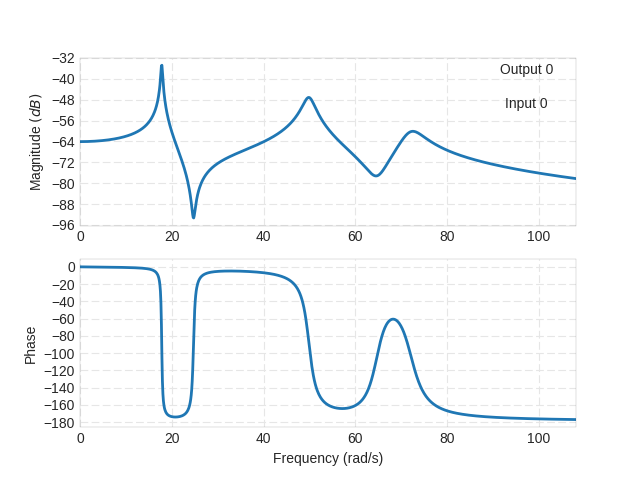

(<matplotlib.axes._subplots.AxesSubplot at 0x7f5d6cf0ae10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5d69b8c940>)

In [7]:
sys.plot_freq_response(0, 0)

M, C and K can be changed and the system will be updated:

In [8]:
sys.C = 20*C
sys.wd

array([ 2.78768234,  6.87957115,  7.95002732])

<IPython.core.display.Javascript object>


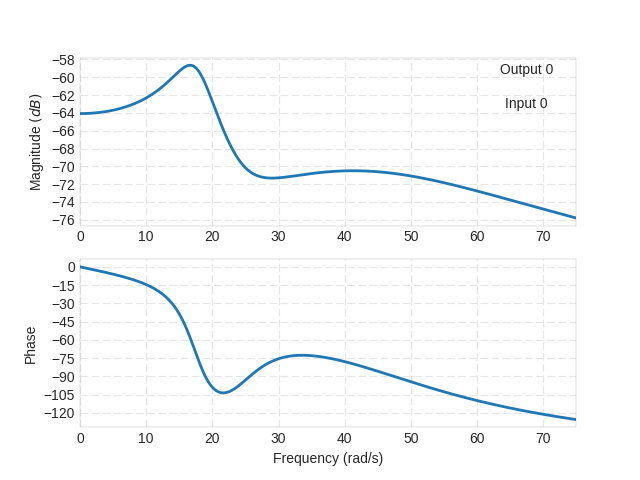

(<matplotlib.axes._subplots.AxesSubplot at 0x7f5d69b0ef98>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5d6967f518>)

In [9]:
sys.plot_freq_response(0, 0)